First we can install the r-packages we need (modify as necessary)

Note: `devtools::install_github("rstudio/keras")` also installs dependencies. In the backend, it still depends on Python and Tensorflow or Pytorch.

In [1]:
devtools::install_github("rstudio/keras")
install.packages("remotes")
remotes::install_github("MansMeg/IntroML",
subdir = "rpackage")

tensorflow  (NA  -> eeb1e66b5...) [GitHub]
png         (NA  -> 0.1-8       ) [CRAN]
here        (NA  -> 1.0.1       ) [CRAN]
RcppTOML    (NA  -> 0.2.2       ) [CRAN]
Rcpp        (NA  -> 1.0.11      ) [CRAN]
reticulate  (NA  -> 1.34.0      ) [CRAN]
whisker     (0.4 -> 0.4.1       ) [CRAN]
config      (NA  -> 0.3.2       ) [CRAN]
tfautograph (NA  -> 0.3.2       ) [CRAN]
tfruns      (NA  -> 1.5.1       ) [CRAN]
zeallot     (NA  -> 0.1.0       ) [CRAN]


png         (NA  -> 0.1-8 ) [CRAN]
here        (NA  -> 1.0.1 ) [CRAN]
RcppTOML    (NA  -> 0.2.2 ) [CRAN]
Rcpp        (NA  -> 1.0.11) [CRAN]
reticulate  (NA  -> 1.34.0) [CRAN]
whisker     (0.4 -> 0.4.1 ) [CRAN]
config      (NA  -> 0.3.2 ) [CRAN]
tfautograph (NA  -> 0.3.2 ) [CRAN]
tfruns      (NA  -> 1.5.1 ) [CRAN]


Installing 9 packages: png, here, RcppTOML, Rcpp, reticulate, whisker, config, tfautograph, tfruns

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpoRL3Wa/remotes123a2e370b/rstudio-tensorflow-eeb1e66/DESCRIPTION’ ... OK
* preparing ‘tensorflow’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘tensorflow_2.14.0.9000.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing 10 packages: png, here, RcppTOML, Rcpp, reticulate, whisker, config, tfautograph, tfruns, zeallot

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Skipping install of 'tensorflow' from a github remote, the SHA1 (eeb1e66b) has not changed since last install.
  Use `force = TRUE` to force installation



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpoRL3Wa/remotes1234762bbd8/rstudio-keras-51e7d77/DESCRIPTION’ ... OK
* preparing ‘keras’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Removed empty directory ‘keras/man-roxygen’
* building ‘keras_2.13.0.9000.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




checkmate (NA -> 2.3.0) [CRAN]


Installing 1 packages: checkmate

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpoRL3Wa/remotes12328ceec06/MansMeg-IntroML-ddc0c8a/rpackage/DESCRIPTION’ ... OK
* preparing ‘uuml’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘uuml_0.3.0.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Then we can run some r-code to make sure everything works

Note: It is not necessary to run `library('tensorflow')` and `install_tensorflow()` since TensorFlow is already installed in the colab environemnt.

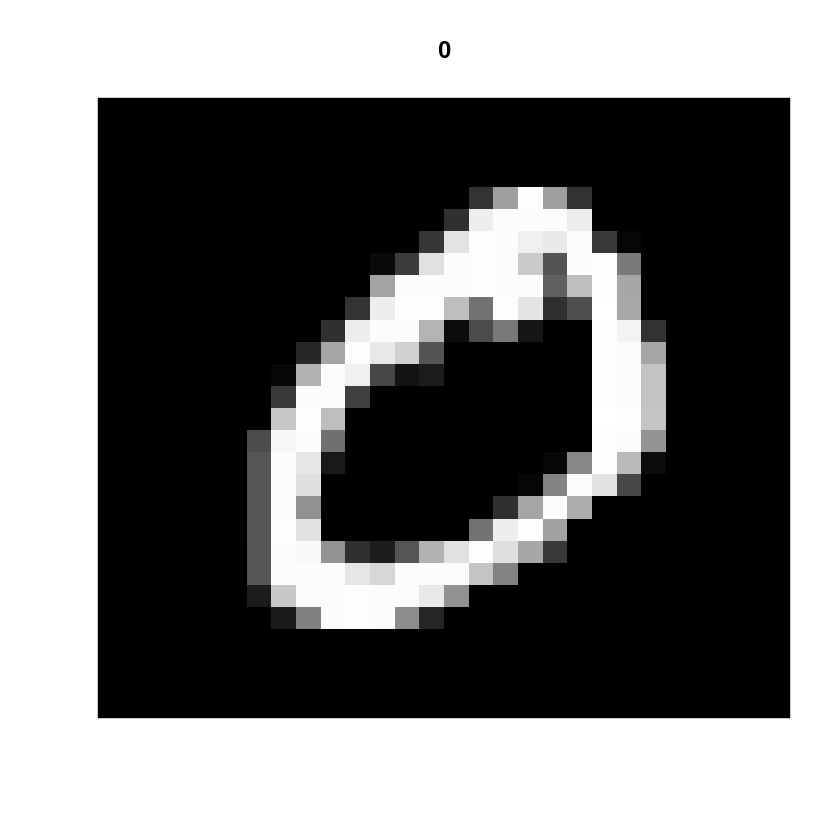

In [2]:
library(keras)
mnist <- dataset_mnist()

idx <- 2
im <- mnist$train$x[idx,,]
# Transpose the image
im <- t(apply(im, 2, rev))
image(1:28, 1:28, im, col=gray((0:255)/255), xlab = "", ylab = "",
xaxt='n', yaxt='n', main=paste(mnist$train$y[idx]))

And run the example from https://tensorflow.rstudio.com/tutorials/beginners/ to make sure model training works

Note! Currently this notebook won't output anything during training so we have to `plot(history)`

In [3]:
mnist$train$x <- mnist$train$x/255
mnist$test$x <- mnist$test$x/255

model <- keras_model_sequential() %>%
  layer_flatten(input_shape = c(28, 28)) %>%
  layer_dense(units = 16, activation = "sigmoid") %>%
  layer_dense(10, activation = "softmax")

  summary(model)

  model %>%
  compile(
    loss = "sparse_categorical_crossentropy",
    optimizer = "sgd",
    metrics = "accuracy"
  )

  history <- model %>%
  fit(
    x = mnist$train$x, y = mnist$train$y,
    epochs = 5,
    validation_split = 0.3,
    verbose = 2
  )

Model: "sequential"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 flatten (Flatten)                  (None, 784)                     0           
 dense_1 (Dense)                    (None, 16)                      12560       
 dense (Dense)                      (None, 10)                      170         
Total params: 12730 (49.73 KB)
Trainable params: 12730 (49.73 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________________________________________________


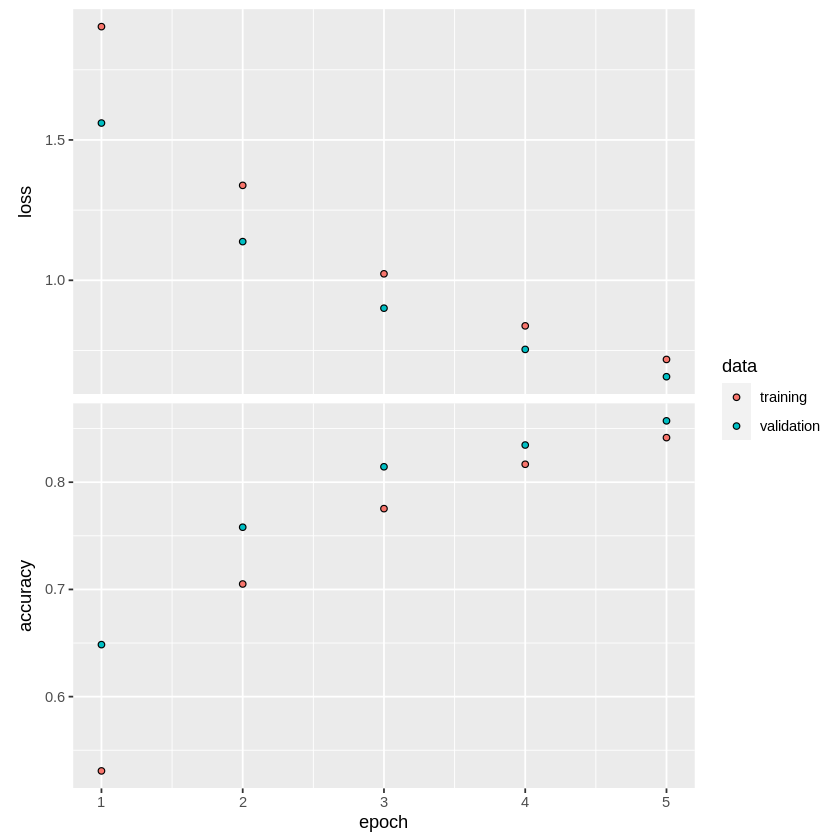

In [13]:
plot(history)